In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk 

In [4]:
data = pd.read_csv("C:/Users/akans/Desktop/Codebank/Indian Diet Recc sys/Assets/ifct2017_compositions.csv")
RecipeData = pd.read_csv("C:/Users/akans/Desktop/Codebank/Indian Diet Recc sys/Assets/Cleaned_Indian_Food_Dataset.csv")
RecipeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TranslatedRecipeName    5938 non-null   object
 1   TranslatedIngredients   5938 non-null   object
 2   TotalTimeInMins         5938 non-null   int64 
 3   Cuisine                 5938 non-null   object
 4   TranslatedInstructions  5938 non-null   object
 5   URL                     5938 non-null   object
 6   Cleaned-Ingredients     5938 non-null   object
 7   image-url               5938 non-null   object
 8   Ingredient-count        5938 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 417.6+ KB


In [149]:
recipeColumn=['TranslatedRecipeName','TranslatedIngredients','TotalTimeInMins','Cuisine','TranslatedInstructions','URL','Cleaned-Ingredients','image-url','Ingredient-count']

In [5]:
data.shape

(542, 356)

In [6]:
data.head()

,code,name,scie,regn,water,water_e,protcnt,protcnt_e,ash,ash_e,...,fumac,fumac_e,malac,malac_e,quinac,quinac_e,sucac,sucac_e,tarac,tarac_e
0,A001,"Amaranth seed, black",Amaranthus cruentus,1,9.89,0.00,14.59,0.00,2.78,0.00,...,0.15,0.00,45.78,0.00,75.53,0.00,1.47,0.00,0.00,0.00
1,A002,"Amaranth seed, pale brown",Amaranthus cruentus,6,9.20,0.40,13.27,0.34,3.05,0.30,...,0.14,0.02,47.16,1.64,75.06,0.57,1.89,0.13,0.00,0.00
2,A003,Bajra,Pennisetum typhoideum,6,8.97,0.60,10.96,0.26,1.37,0.17,...,1.99,0.59,0.86,0.21,0.00,0.00,0.02,0.01,0.00,0.00
3,A004,Barley,Hordeum vulgare,6,9.77,0.38,10.94,0.51,1.06,0.22,...,0.00,0.00,0.90,0.48,0.52,0.09,0.17,0.06,3.24,1.27
4,A005,Jowar,Sorghum vulgare,6,9.01,0.77,9.97,0.43,1.39,0.34,...,1.84,0.79,0.51,0.24,0.00,0.00,3.88,1.22,0.00,0.00


In [7]:
data.info(verbose="Assets")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 356 columns):
 #    Column           Dtype  
---   ------           -----  
 0    code             object 
 1    name             object 
 2    scie             object 
 3    regn             int64  
 4    water            float64
 5    water_e          float64
 6    protcnt          float64
 7    protcnt_e        float64
 8    ash              float64
 9    ash_e            float64
 10   fatce            float64
 11   fatce_e          float64
 12   fibtg            float64
 13   fibtg_e          float64
 14   fibins           float64
 15   fibins_e         float64
 16   fibsol           float64
 17   fibsol_e         float64
 18   choavldf         float64
 19   choavldf_e       float64
 20   enerc            int64  
 21   enerc_e          int64  
 22   dhbenzac34       float64
 23   dhbenzac34_e     float64
 24   hbenzal3         float64
 25   hbenzal3_e       float64
 26   pcathac          flo

In [8]:
data.describe()

,regn,water,water_e,protcnt,protcnt_e,ash,ash_e,fatce,fatce_e,fibtg,...,fumac,fumac_e,malac,malac_e,quinac,quinac_e,sucac,sucac_e,tarac,tarac_e
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,...,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.00000,542.000000,542.000000
mean,3.402214,66.378210,0.321882,10.685314,0.208819,1.346993,0.054114,4.237786,0.103247,3.881236,...,4.872989,0.508229,28.648745,1.501384,14.982177,0.609815,21.770775,1.11869,8.644170,0.838487
std,2.143777,29.567544,0.422862,8.817749,0.346758,1.148785,0.081362,8.933187,0.267008,6.519471,...,14.347406,2.576624,66.049474,6.437184,60.033399,2.973261,63.456348,4.47848,40.640447,5.078655
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,68.400000,0.000000,1.490000,0.000000,0.750000,0.000000,0.350000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,3.000000,77.240000,0.150000,10.365000,0.045000,1.070000,0.010000,0.905000,0.010000,1.860000,...,0.145000,0.000000,0.350000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,6.000000,85.547500,0.545000,19.687500,0.297500,1.370000,0.087500,3.830000,0.050000,4.425000,...,1.827500,0.200000,27.307500,0.812500,0.000000,0.000000,5.417500,0.40500,0.000000,0.000000
max,10.000000,95.770000,2.780000,37.800000,3.650000,8.180000,0.580000,64.270000,3.030000,47.550000,...,111.000000,41.840000,436.000000,113.000000,651.000000,40.500000,652.000000,73.80000,382.000000,75.900000


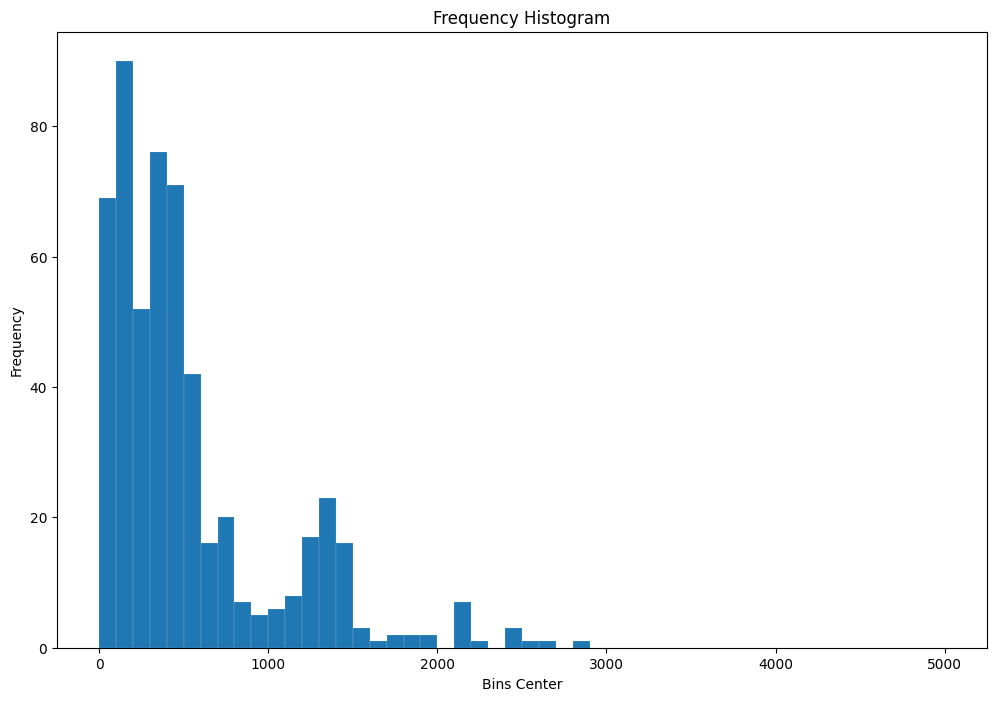

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
#the following step converts dataframe's calories column of each recipe into a numpy array to be plotted into a frequency histogram
#of what caloric value ranges iccur the most
ax.hist(data.enerc.to_numpy(),   bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900, 2000,
                                       2100,2200,2300,2400,2500,2600,2700,2800,2900,3000,3100,3200,3300,3400,3500,3600,3700,3800,3900, 4000,
                                       4100,4200,4300,4400,4500,4600,4700,4800,4900, 5000],linewidth=0.1, edgecolor="white")
plt.show()

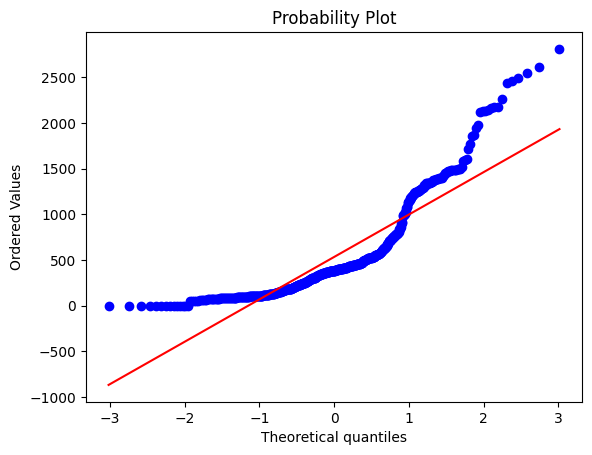

In [10]:
import pylab 
import scipy.stats as stats
stats.probplot(data.enerc.to_numpy(), dist="norm", plot=pylab)
pylab.show()



In [11]:
print(data.fams.max())
print(data.fapu.describe())



38336.0
count      542.000000
mean      1100.464963
std       3553.978800
min          0.000000
25%        132.000000
50%        303.500000
75%        646.000000
max      44915.000000
Name: fapu, dtype: float64


In [12]:
dataset=data.copy()
columns=['code','name','regn','protcnt','fatce','fibtg','choavldf','enerc','na', 'ca','thia','ribf','nia', 'pantac','vitb6c', 'biot', 'folsum', 'vitc']
dataset=dataset[columns]

In [13]:
#     1                      2               3                   4                   5               6           7           8                   9               10                  11                  12              13                  14                  15          
print(data.protcnt.max(),data.fatce.max(),data.fibtg.max(),data.choavldf.max(),data.enerc.max(),data.na.max(),data.ca.max(),data.thia.max(), data.ribf.max(), data.nia.max(), data.pantac.max(), data.vitb6c.max(), data.biot.max(), data.folsum.max(), data.vitc.max())
data.vitc.describe()



37.8 64.27 47.55 84.87 2809 849.0 1664.0 0.98 0.83 15.66 9.32 316.0 2875.0 1032.0 252.0


count    542.000000
mean      12.677804
std       29.674910
min        0.000000
25%        0.000000
50%        0.000000
75%       11.440000
max      252.000000
Name: vitc, dtype: float64

In [14]:
MaxDailyProt = 50       #gm
MaxDailyFat = 100       #gm
MaxDailyFib = 50        #gm
MaxDailyCarb = 100      #gm carbohydrates
MaxDailyCalo = 3000     #kJ calories
MaxDailySod = 2300      #mg calcium
MaxDailyCalci = 1700    #mg sodium
MaxDailyThia=1.4        #mg vit b1
MaxDailyRibf=1.3        #mg vit b2
MaxDailyNia=16          #mg vit b3
MaxDailyPant= 5         #mg vit b5
MaxDailyVitb6=1.3       #mg vit b6
MaxDailyBiot=30         #mcg (ug) vit b7
MaxDailyFols=400        #mcg (ug) vit b9
MaxDailyVitc=90         #mg vit c
#columns=['code','name','regn','protcnt','fatce','fibtg','choavldf','enerc','na', 'ca','thia','ribf','nia', 'pantac','vitb6c', 'biot', 'folsum', 'vitc']
max_list=[MaxDailyProt, MaxDailyFat ,MaxDailyFib, MaxDailyCarb, MaxDailyCalo, MaxDailySod, MaxDailyCalci, 
          MaxDailyThia, MaxDailyRibf, MaxDailyNia, MaxDailyPant, MaxDailyVitb6, MaxDailyBiot,MaxDailyFols, MaxDailyVitc]

In [15]:
extracted_data=dataset.copy()
for column,maximum in zip(extracted_data.columns[3:17],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [16]:
# extracted_data.info()
extracted_data.regn.describe()

count    398.000000
mean       3.957286
std        2.077997
min        1.000000
25%        2.000000
50%        5.000000
75%        6.000000
max       10.000000
Name: regn, dtype: float64

In [17]:
extracted_data.iloc[:,3:17].corr()

,protcnt,fatce,fibtg,choavldf,enerc,na,ca,thia,ribf,nia,pantac,vitb6c,biot,folsum
protcnt,1.000000,0.499331,0.323639,0.180482,0.666522,0.411937,0.244539,0.601965,0.462705,0.716274,0.636565,0.497333,0.244579,0.343632
fatce,0.499331,1.000000,0.242248,-0.046403,0.727190,0.193669,0.413474,0.451242,0.192478,0.304777,0.144596,0.341680,0.288119,0.100173
fibtg,0.323639,0.242248,1.000000,0.432081,0.503529,-0.109706,0.487579,0.520734,0.269294,0.053680,0.136296,0.324715,-0.052381,0.471324
choavldf,0.180482,-0.046403,0.432081,1.000000,0.617621,-0.244997,0.076323,0.402921,0.019007,0.012971,0.112388,0.103429,-0.186101,0.263423
enerc,0.666522,0.727190,0.503529,0.617621,1.000000,0.071975,0.372622,0.678532,0.245674,0.374610,0.311748,0.402270,0.126067,0.307748
na,0.411937,0.193669,-0.109706,-0.244997,0.071975,1.000000,0.053927,0.083498,0.283673,0.303479,0.362972,0.095851,0.481824,-0.094859
ca,0.244539,0.413474,0.487579,0.076323,0.372622,0.053927,1.000000,0.358574,0.224385,0.036383,-0.047024,0.253706,0.112788,0.283411
thia,0.601965,0.451242,0.520734,0.402921,0.678532,0.083498,0.358574,1.000000,0.362937,0.314204,0.371751,0.413670,0.110909,0.469608
ribf,0.462705,0.192478,0.269294,0.019007,0.245674,0.283673,0.224385,0.362937,1.000000,0.434260,0.383118,0.343674,0.102935,0.201816
nia,0.716274,0.304777,0.053680,0.012971,0.374610,0.303479,0.036383,0.314204,0.434260,1.000000,0.492136,0.359663,0.049014,-0.025300


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,3:17].to_numpy())

In [19]:
prep_data

array([[ 0.87978824,  0.1005757 ,  0.24443462, ...,  1.70513107,
        -0.34363097, -0.26635494],
       [ 0.7154479 ,  0.08275329,  0.30785102, ...,  0.73193758,
        -0.35604317, -0.31487432],
       [ 0.42785232,  0.06988155,  0.87437083, ...,  0.38845753,
        -0.66138343, -0.11557968],
       ...,
       [-0.93667046, -0.46776111, -0.74486116, ..., -1.15720271,
        -0.82025966, -0.74354907],
       [-0.93667046, -0.46776111, -0.74486116, ..., -1.15720271,
        -0.82025966, -0.74354907],
       [-0.93667046, -0.46776111, -0.74486116, ..., -1.15720271,
        -0.82025966, -0.74354907]])

In [227]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)


NearestNeighbors(algorithm='brute', metric='cosine')

In [228]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [229]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [230]:
pipeline.transform(extracted_data.iloc[0:1,3:17].to_numpy())[0]

array([  0,   1, 282, 302, 284,  12,  13, 217, 218, 178], dtype=int64)

In [231]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:2,3:17].to_numpy())[0]]

,code,name,regn,protcnt,fatce,fibtg,choavldf,enerc,na,ca,thia,ribf,nia,pantac,vitb6c,biot,folsum,vitc
0,A001,"Amaranth seed, black",1,14.59,5.74,7.02,59.98,1490,2.70,181.00,0.040,0.040,0.45,0.24,0.500,1.92,27.44,0.00
1,A002,"Amaranth seed, pale brown",6,13.27,5.56,7.47,61.46,1489,2.81,162.00,0.040,0.040,0.52,0.28,0.330,1.87,24.65,0.00
282,H002,"Arecanut, dried, brown",6,5.78,4.35,11.44,70.42,1467,12.06,61.00,0.040,0.030,0.71,0.12,0.320,1.66,7.54,0.00
302,I001,"Jaggery, cane",6,1.85,0.16,0.00,84.87,1480,25.38,107.00,0.040,0.010,0.02,0.23,0.710,0.58,14.40,0.00
284,H004,"Arecanut, fresh",2,2.73,5.51,7.63,45.00,1024,5.53,34.03,0.038,0.031,0.74,0.21,0.250,1.70,26.51,0.00
12,A013,"Rice, raw, brown",6,9.16,1.24,4.43,74.80,1480,3.64,10.93,0.270,0.060,3.40,0.61,0.370,1.38,11.51,0.00
13,A014,"Rice, parboiled, milled",6,7.81,0.55,3.74,77.16,1471,3.16,8.11,0.170,0.060,2.51,0.55,0.220,0.31,9.75,0.00
217,E057,"Raisins, dried, black",6,2.57,0.34,3.92,71.29,1279,10.99,73.24,0.090,0.040,0.48,0.21,0.170,0.73,38.30,2.05
218,E058,"Raisins, dried, golden",6,2.76,0.35,4.56,68.79,1241,10.16,51.83,0.090,0.040,0.64,0.18,0.170,0.75,34.68,1.85
178,E018,"Dates, dry, dark brown",2,2.38,0.35,9.10,72.67,1301,3.09,66.13,0.020,0.030,1.09,0.53,0.153,0.94,12.80,3.84


In [191]:
extracted_data[extracted_data['code'].str.contains('' ,regex=False)]

,code,name,regn,protcnt,fatce,fibtg,choavldf,enerc,na,ca,thia,ribf,nia,pantac,vitb6c,biot,folsum,vitc
0,A001,"Amaranth seed, black",1,14.59,5.74,7.02,59.98,1490,2.70,181.00,0.04,0.04,0.45,0.24,0.50,1.92,27.44,0.0
1,A002,"Amaranth seed, pale brown",6,13.27,5.56,7.47,61.46,1489,2.81,162.00,0.04,0.04,0.52,0.28,0.33,1.87,24.65,0.0
2,A003,Bajra,6,10.96,5.43,11.49,61.78,1456,4.11,27.35,0.25,0.20,0.86,0.50,0.27,0.64,36.11,0.0
3,A004,Barley,6,10.94,1.30,15.64,61.29,1321,7.56,28.64,0.36,0.18,2.84,0.14,0.31,2.38,31.58,0.0
4,A005,Jowar,6,9.97,1.73,10.22,67.68,1398,5.42,27.60,0.35,0.14,2.10,0.27,0.28,0.70,39.42,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,T010,Safflower oil (blended),4,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
538,T011,Soyabean oil,6,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
539,T012,Sunflower oil,6,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
540,T013,Ghee,6,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [225]:
def scaling(dataframe,reclow,rechigh):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,reclow:rechigh].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values,low, high):
    extracted_data=dataframe.copy()
    for column,maximum in zip(extracted_data.columns[low:high],max_nutritional_values):
        extracted_data=extracted_data[extracted_data[column]<maximum]
    return extracted_data
# def recipefier(dataframe,ingredient_filter):
#     for ingredient in ingredient_filter:
#         extracted_data=extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient,regex=False)] 

def apply_pipeline(pipeline,_input,extracted_data,reclow,rechigh):
    return extracted_data.iloc[pipeline.transform(_input[reclow:rechigh])[0]]

def recommand(dataframe,_input,max_nutritional_values,low, high, reclow,rechigh, ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values, reclow,rechigh)
    prep_data,scaler=scaling(extracted_data,low,high)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data, low, high)


In [226]:
findlow = 7
findhigh = 18
reclow = 7
rechigh =18
test_input=extracted_data.iloc[findlow:findhigh].to_numpy()
#.01,0.03,.5,.2,.33,.6
#test_input=[[.01,0.03,.5,.2,.33,.6]]

final = recommand(dataset,test_input,max_list,findlow,findhigh, reclow, rechigh)

name = final['name'].tolist()


ValueError: could not convert string to float: 'A015'

In [168]:
for k in range(len(name)):
    for i in ",0123456789":
        name[k]=name[k].replace(i," ")
        name[k]=name[k].lower()
print(name)


# from nltk.tokenize import RegexpTokenizer    
# tk = RegexpTokenizer('\n+', gaps = True)
# fin = tk.tokenize(name)
# lis=list(fin)
# # lis
# # finlist = pd.DataFrame(lis,columns=['Ingredlist'])
# # finlist


['broad beans', 'cherries  red', 'ash gourd', 'apricot  processed', 'water melon  pale green']


In [162]:
#vitamin A levels: Normal values range from 15 to 60 micrograms per deciliter (mcg/dL) or 0.52 to 2.09 micromoles per liter (micromol/L).



In [181]:
# for i in range(len(name)):
extractedRecData_data = RecipeData[RecipeData['Cleaned-Ingredients'].str.contains(name[0],regex=False)]
extractedRecData_data

,TranslatedRecipeName,TranslatedIngredients,TotalTimeInMins,Cuisine,TranslatedInstructions,URL,Cleaned-Ingredients,image-url,Ingredient-count
831,Broad Bean And Courgette Zucchini Pilaf Recipe,"1 cup Basmati rice,2 cloves Garlic,Salt - to t...",50,Continental,To begin making the Broad Bean and Courgette Z...,https://www.archanaskitchen.com/broad-bean-and...,"basmati rice,salt,green chilli,mint leaves (pu...",https://www.archanaskitchen.com/images/archana...,9
863,Avarekalu Usli (Broad Bean In Gravy) Recipe,"Salt - as required,1/2 teaspoon Turmeric powde...",40,South Indian Recipes,"To begin making the Avarekaalu Usli, heat oil ...",https://www.archanaskitchen.com/avarekaalu-usl...,"lemon,salt,ginger,asafoetida (hing),mustard se...",https://www.archanaskitchen.com/images/archana...,12
905,Greek Style Briami Recipe (Simple Vegetable St...,"Salt - to taste,2 Stalks Celery - chopped,2 Ca...",60,Greek,We begin making the Greek Style Briami Recipe ...,https://www.archanaskitchen.com/greek-style-br...,"tomato,salt,brinjal (baingan eggsplant),caulif...",https://www.archanaskitchen.com/images/archana...,14
1899,Bhogichi Bhaji Recipe (Maharashtrian Mixed Veg...,"5 Ber - washed and stems removed (optional),2 ...",40,Maharashtrian Recipes,"To begin making Bhogichi Bhaji, put a wok on m...",https://www.archanaskitchen.com/bhogichi-bhaji...,"green chillies,salt,brinjal (baingan eggsplant...",https://www.archanaskitchen.com/images/archana...,18
1913,Bengali Style Khichuri Aar Labra Recipe-Khichd...,"1/4 teaspoon Kalonji (Onion Nigella Seeds),1/2...",85,Bengali Recipes,To begin making Bengali Style Khichuri Aar Lab...,https://www.archanaskitchen.com/khichuri-aar-l...,"brinjal (baingan eggsplant),cumin seeds (jeera...",https://www.archanaskitchen.com/images/archana...,29
2017,Greek Style Gigantes Plaki Recipe-Oven Baked B...,"1 teaspoon Sugar,1 cup Homemade tomato puree,2...",305,Greek,To begin making the Greek Style Gigantes Plaki...,https://www.archanaskitchen.com/greek-style-gi...,"tomato,cinnamon powder (dalchini),bay leaf (te...",https://www.archanaskitchen.com/images/archana...,12
2208,Thai Style Sweet Khao Tom Recipe (Coconut Stic...,1/2 cup White broad beans - soaked in overnigh...,35,Thai,To begin making the Thai Style Sweet Khao Tom ...,https://www.archanaskitchen.com/thai-style-swe...,"salt,rice,white broad beans,sugar,nendra pazha...",https://www.archanaskitchen.com/images/archana...,6
2339,Chikkudukaya Vepudu Recipe-Broad Beans Masala ...,"1/2 teaspoon Turmeric powder (Haldi),Salt - to...",35,Andhra,To begin making Chikkudukaya Vepudu Recipe fir...,https://www.archanaskitchen.com/chikkudukaya-v...,"tomato,salt,ginger,red chilli powder,cloves ga...",https://www.archanaskitchen.com/images/archana...,11
2454,Attukal Mochai Kuzhambu Recipe-Mutton Leg & Fi...,"2 teaspoons Tamarind Paste,Coriander (Dhania) ...",120,Tamil Nadu,To prepare Attukal Mochai Kuzhambu Recipe | Mu...,https://www.archanaskitchen.com/attukal-mochai...,"tomato,coriander (dhania) leaves,brinjal (bain...",https://www.archanaskitchen.com/images/archana...,23
2619,Spinach & Broad Bean Shakshuka Recipe,"1 Onion - sliced,1 teaspoon Sugar,Sunflower Oi...",55,European,To begin making the Spinach & Broad Bean Shaks...,https://www.archanaskitchen.com/spinach-broad-...,"tomato,salt,cumin powder (jeera),sunflower oil...",https://www.archanaskitchen.com/images/archana...,14


In [164]:
# test_input=extracted_data.iloc[:1,3:17].to_numpy()
# #recommand(dataset,test_input,max_list)

# recommand(dataset,test_input,max_list)
